# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pandas.plotting as plt2
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

# Loading data

In [2]:
data = pd.read_csv('diabetes.csv',names=['Pregnancies','Glucose',
    'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is YES 0 is NO

In [3]:
data.shape

(768, 9)

# Descriptive analysis :
* ## Finding missing values

In [4]:
Features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
print('Missing values :')
for values in data[Features]:
    print(values + '=' + str(data[values][data[values]==0].count()))

Missing values :
Glucose=5
BloodPressure=35
SkinThickness=227
Insulin=374
BMI=11


* ## Visually explore the data using histograms

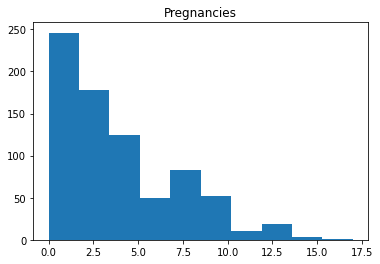

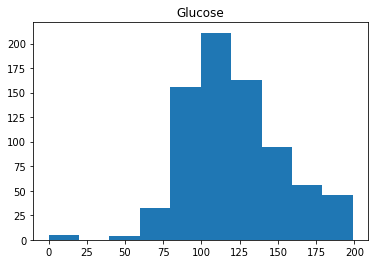

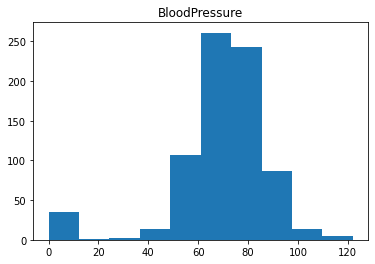

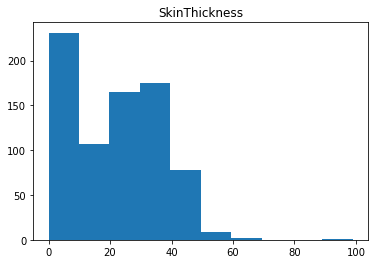

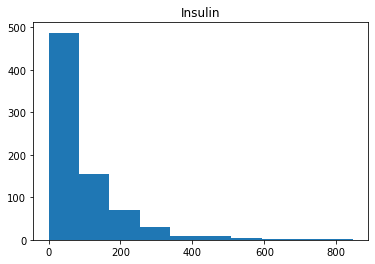

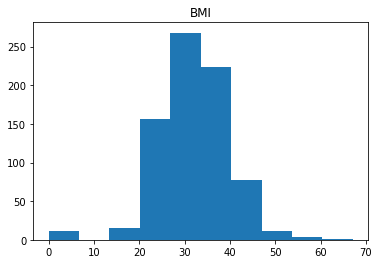

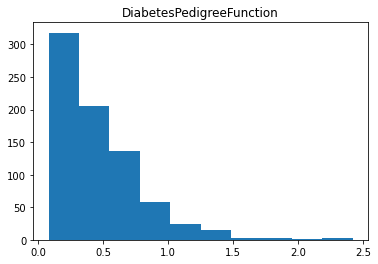

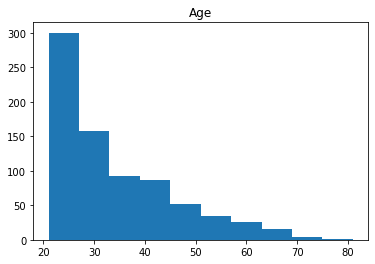

In [5]:
for values in data.drop('Outcome',axis=1):
    plt.hist(data[values])
    plt.title(values)
    plt.show()

* ## Count(frequency) plot describing the data types

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
VariableDType = pd.DataFrame(data.dtypes.value_counts(),columns=['Count of Variable'])

In [8]:
VariableDType

,Count of Variable
int64,7
float64,2


Text(0.5, 1.0, 'Frequency plot describing the data types and the count of variables')

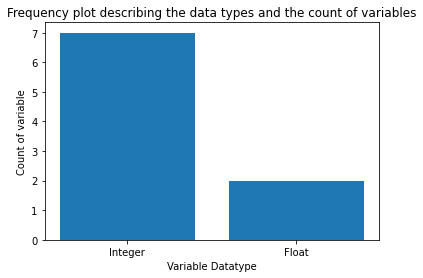

In [9]:
plt.bar(['Integer','Float'],VariableDType['Count of Variable'])
plt.xlabel('Variable Datatype')
plt.ylabel('Count of variable')
plt.title('Frequency plot describing the data types and the count of variables')

* ## Treating missing values

In [10]:
def median_target(var):   
    temp = data[data[var]!=0]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [11]:
median_target('Glucose')

,Outcome,Glucose
0,0,107
1,1,140


In [12]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose']==0), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose']==0), 'Glucose'] = 140

In [13]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [14]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure']==0), 'BloodPressure'] = 70.0
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure']==0), 'BloodPressure'] = 74.5

In [15]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27
1,1,32


In [16]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness']==0), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness']==0), 'SkinThickness'] = 32

In [17]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [18]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin']==0), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin']==0), 'Insulin'] = 169.5

In [19]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [20]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI']==0), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI']==0), 'BMI'] = 34.3

# Data Exploration :  
* ## Count of outcomes by their value

/Users/rajeshb/Downloads/Apps/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


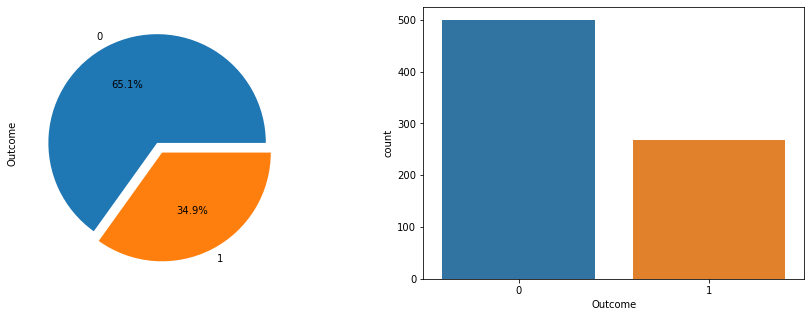

In [21]:
f,ax = plt.subplots(1,2,figsize=(15,5))
data['Outcome'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',explode=[0,.1])
sns.countplot('Outcome',data=data,ax=ax[1]);

The above graph shows that the data is a bit biased towards datapoints having outcome value as 0. The ratio of non-diabetics to diabetic patients is 65% to 35% which is sufficient for making the model.

* ## Scatter charts between the pair of variables

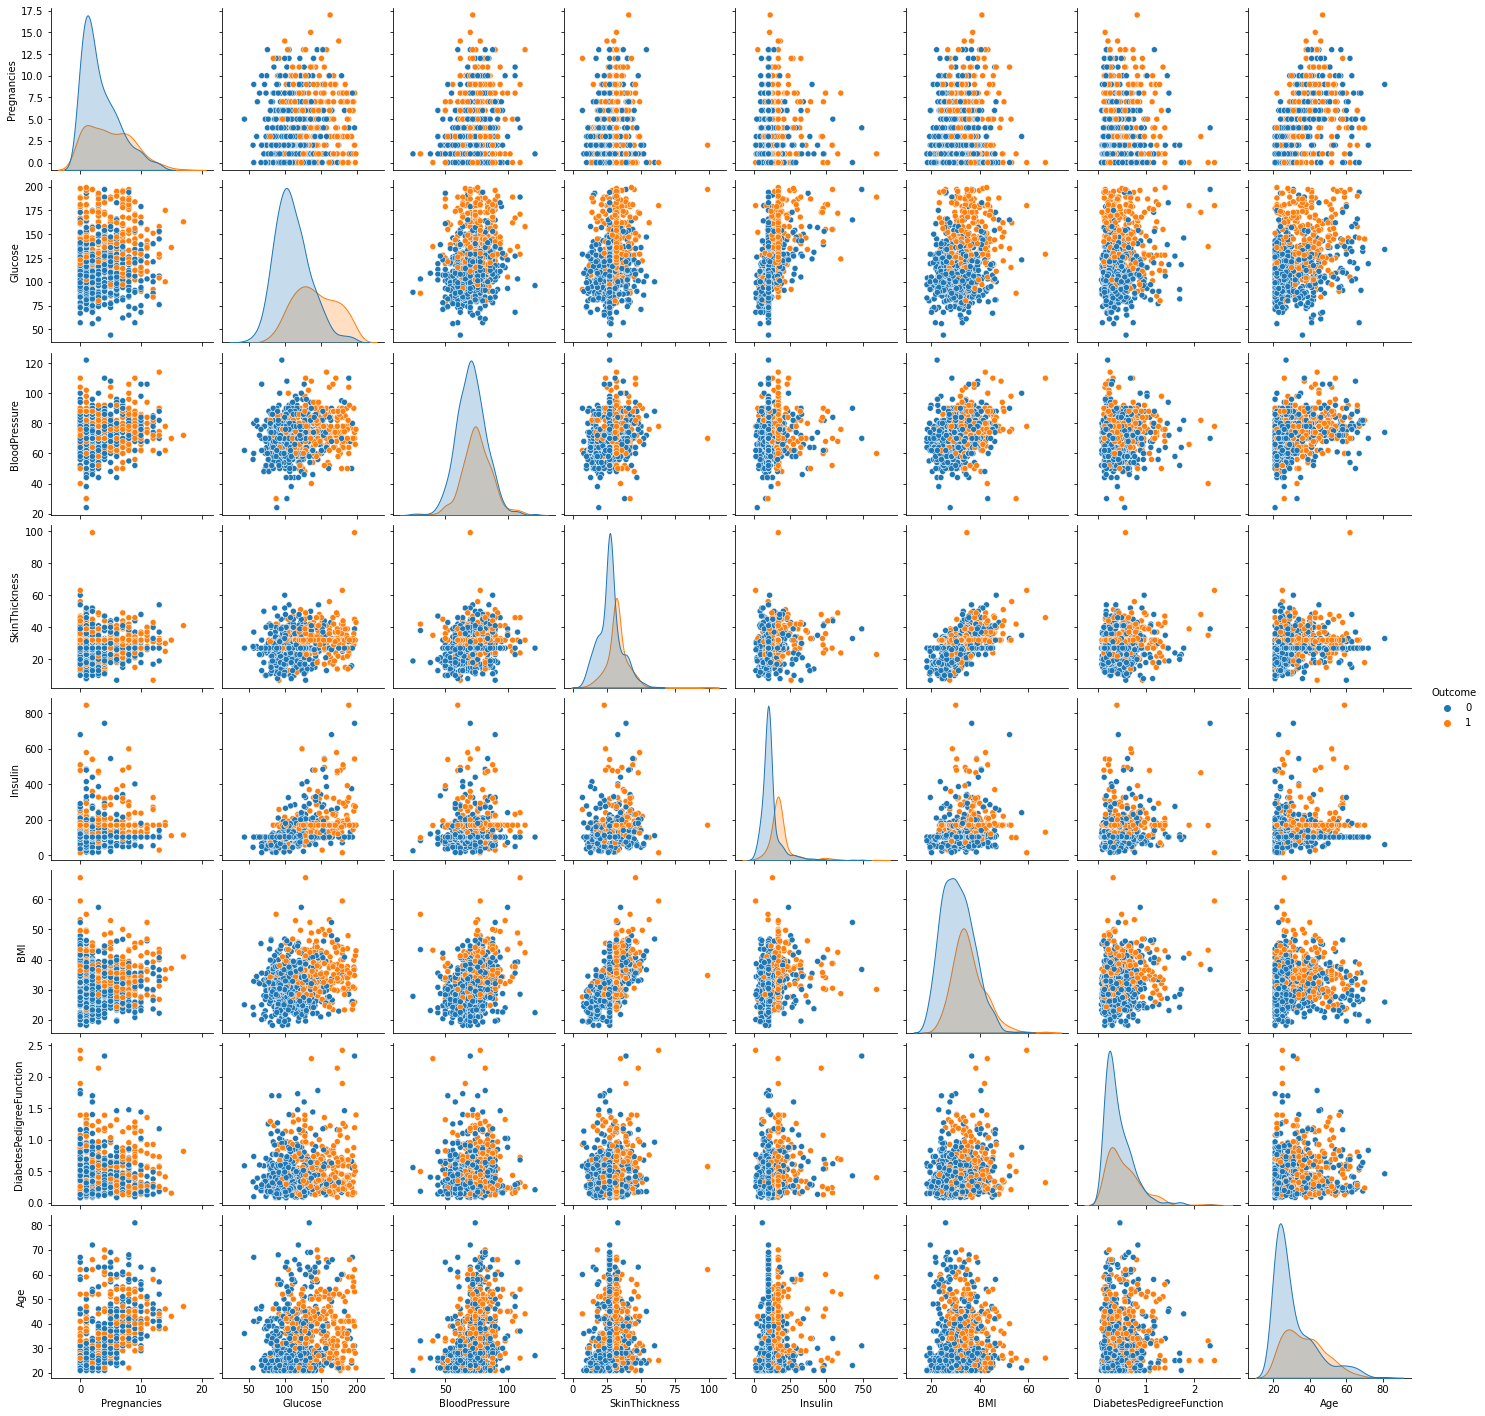

In [22]:
sns.pairplot(data,hue='Outcome');

The above graph shows that there is a huge amount of overlapping in data points and cannot be seperated linearly.

* ## Heatmap for correlation analysis

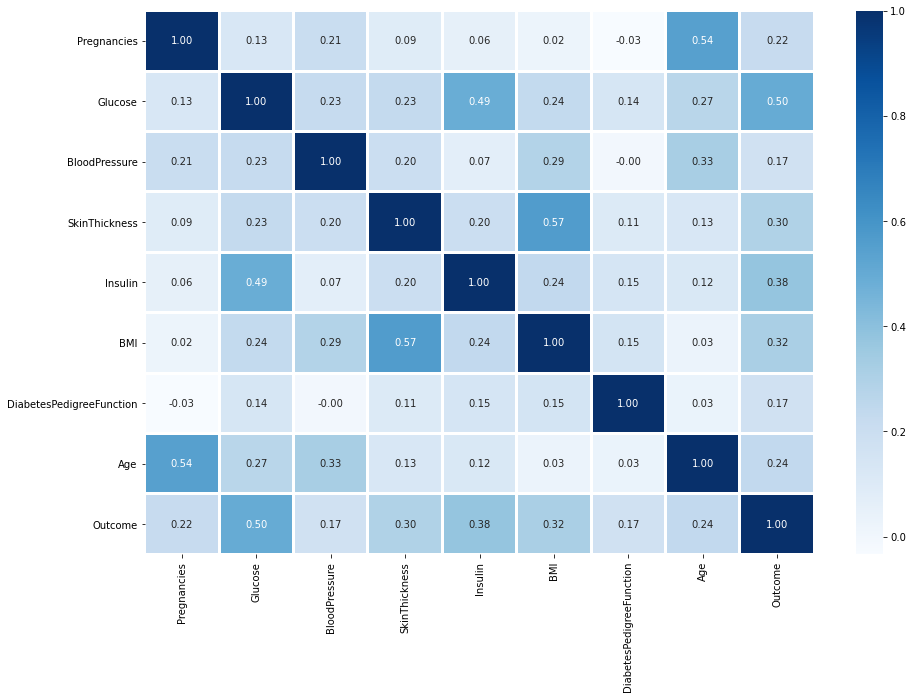

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues',fmt='.2f',linewidth=2);

# Data Modeling :  
As we can see in the scatter chart that there is a huge amount of overlapping in the data points and cannot be linearly seperated. So it is better to use non-linear classifiers like Random forest, Support Vector Machine(SVM), Naive Bayes Classifier and K-nearest Neighbors Algorithm.  

Non-linear classifiers are more more accurate than linear classifiers.

In [24]:
X = data.drop('Outcome',axis=1)
Y = data.Outcome

In [25]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35,169.5,33.6,0.627,50
1,1,85,66.0,29,102.5,26.6,0.351,31
2,8,183,64.0,32,169.5,23.3,0.672,32
3,1,89,66.0,23,94.0,28.1,0.167,21
4,0,137,40.0,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,63
764,2,122,70.0,27,102.5,36.8,0.340,27
765,5,121,72.0,23,112.0,26.2,0.245,30
766,1,126,60.0,32,169.5,30.1,0.349,47


In [26]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [27]:
# Data standardization
sc = StandardScaler()
sc.fit(X)

X_std = pd.DataFrame(sc.transform(X),columns=X.columns)
X_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679177,0.298449,2.128317,0.429525,0.067679,-0.908682,2.532136
764,-0.547919,0.010607,-0.197495,-0.235210,-0.440843,0.634868,-0.398282,-0.531023
765,0.342981,-0.022240,-0.032180,-0.685405,-0.334153,-0.906722,-0.685193,-0.275760
766,-0.844885,0.141994,-1.024067,0.327535,0.311604,-0.339533,-0.371101,1.170732


In [28]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_std,Y,test_size=0.25,random_state=0)
print('\nDimension of Xtrain :',Xtrain.shape)
print('\nDimension of Xtest :',Xtest.shape)
print('\nDimension of Ytrain :',Ytrain.shape)
print('\nDimension of Ytest :',Ytest.shape)


Dimension of Xtrain : (576, 8)

Dimension of Xtest : (192, 8)

Dimension of Ytrain : (576,)

Dimension of Ytest : (192,)


In [29]:
names = ["RandomForestClassifier","SVC","GaussianNB"]

classifiers = [
    RandomForestClassifier(),
    SVC(random_state=0, kernel='rbf',probability=True),
    GaussianNB(),
]

In [30]:
from sklearn.metrics import log_loss
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(Xtrain, Ytrain)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(Xtest)
    acc = accuracy_score(Ytest, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(Xtest)
    ll = log_loss(Ytest, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

RandomForestClassifier
****Results****
Accuracy: 90.1042%
Log Loss: 0.22839545628474398
SVC
****Results****
Accuracy: 84.3750%
Log Loss: 0.35795994562382843
GaussianNB
****Results****
Accuracy: 78.1250%
Log Loss: 0.5600538488536991


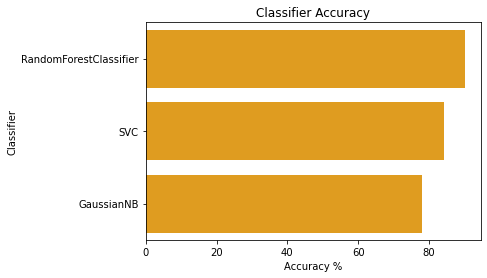

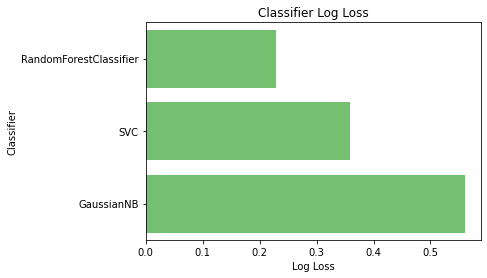

In [31]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="orange")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

RandomForestClassifier

In [32]:
RFCfr = RandomForestClassifier()

In [33]:
RFCfr.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [34]:
Ypred = RFCfr.predict(Xtest)

In [35]:
cm1 = confusion_matrix(Ytest,Ypred)

In [36]:
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       130
           1       0.85      0.90      0.88        62

    accuracy                           0.92       192
   macro avg       0.90      0.91      0.91       192
weighted avg       0.92      0.92      0.92       192



In [37]:
print('Confusion matrix :','\n',cm1)

print('\nAccuracy :',accuracy_score(Ytest,Ypred))

print('\nSensitivity : ', cm1[0,0]/(cm1[0,0]+cm1[0,1]) )
 
print('\nSpecificity : ', cm1[1,1]/(cm1[1,0]+cm1[1,1]))

Confusion matrix : 
 [[120  10]
 [  6  56]]

Accuracy : 0.9166666666666666

Sensitivity :  0.9230769230769231

Specificity :  0.9032258064516129


In [38]:
train_rfc_probabilities = RFCfr.predict_proba(Xtrain)[:,1]
train_rfc_fpr, train_rfc_tpr, train_rfc_thershold = roc_curve(Ytrain, train_rfc_probabilities)

test_rfc_probabilities = RFCfr.predict_proba(Xtest)[:,1]
test_rfc_fpr, test_rfc_tpr, test_rfc_thershold = roc_curve(Ytest, test_rfc_probabilities)

Text(0.5, 1.0, 'Receiver operating characteristics - ROC Curve')

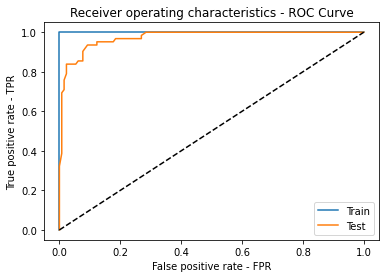

In [39]:
plt.plot(train_rfc_fpr, train_rfc_tpr, label='Train')
plt.plot(test_rfc_fpr, test_rfc_tpr, label='Test')

plt.plot([0,1],[0,1], color='black',linestyle='--')

plt.xlabel('False positive rate - FPR')
plt.ylabel('True positive rate - TPR')
plt.legend()
plt.title('Receiver operating characteristics - ROC Curve')

* SVM(Support vector machine) classifier :

In [40]:
svc=SVC(random_state=0, kernel='rbf',probability=True)

In [41]:
svc.fit(Xtrain,Ytrain)

SVC(probability=True, random_state=0)

In [42]:
Ypred2 = svc.predict(Xtest)

In [43]:
cm2 = confusion_matrix(Ytest,Ypred2)

In [44]:
print(classification_report(Ytest,Ypred2))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       130
           1       0.78      0.73      0.75        62

    accuracy                           0.84       192
   macro avg       0.82      0.81      0.82       192
weighted avg       0.84      0.84      0.84       192



In [45]:
print('Confusion matrix :','\n',cm2)

print('\nAccuracy :',accuracy_score(Ytest,Ypred2))

print('\nSensitivity : ', cm2[0,0]/(cm2[0,0]+cm2[0,1]) )
 
print('\nSpecificity : ', cm2[1,1]/(cm2[1,0]+cm2[1,1]))

Confusion matrix : 
 [[117  13]
 [ 17  45]]

Accuracy : 0.84375

Sensitivity :  0.9

Specificity :  0.7258064516129032


In [46]:
train_svc_probabilities = svc.predict_proba(Xtrain)[:,1]
train_svc_fpr, train_svc_tpr, train_svc_thershold = roc_curve(Ytrain, train_svc_probabilities)

test_svc_probabilities = svc.predict_proba(Xtest)[:,1]
test_svc_fpr, test_svc_tpr, test_svc_thershold = roc_curve(Ytest, test_svc_probabilities)

Text(0.5, 1.0, 'Receiver operating characteristics - ROC Curve')

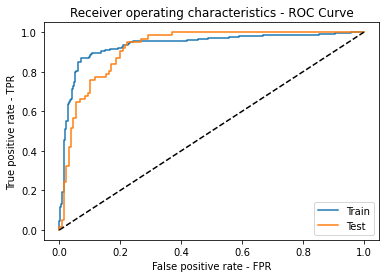

In [47]:
plt.plot(train_svc_fpr, train_svc_tpr, label='Train')
plt.plot(test_svc_fpr, test_svc_tpr, label='Test')

plt.plot([0,1],[0,1], color='black',linestyle='--')

plt.xlabel('False positive rate - FPR')
plt.ylabel('True positive rate - TPR')
plt.legend()
plt.title('Receiver operating characteristics - ROC Curve')

* Naive bayes classifier :

In [48]:
gnb = GaussianNB()

In [49]:
gnb.fit(Xtrain,Ytrain)

GaussianNB()

In [50]:
Ypred3 = gnb.predict(Xtest)

In [51]:
cm3 = confusion_matrix(Ytest,Ypred3)

In [52]:
print(classification_report(Ytest,Ypred3))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       130
           1       0.69      0.58      0.63        62

    accuracy                           0.78       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.78      0.78       192



In [53]:
print('Confusion matrix :','\n',cm3)

print('\nAccuracy :',accuracy_score(Ytest,Ypred3))

print('\nSensitivity : ', cm3[0,0]/(cm3[0,0]+cm3[0,1]) )
 
print('\nSpecificity : ', cm3[1,1]/(cm3[1,0]+cm3[1,1]))

Confusion matrix : 
 [[114  16]
 [ 26  36]]

Accuracy : 0.78125

Sensitivity :  0.8769230769230769

Specificity :  0.5806451612903226


In [54]:
train_gnb_probabilities = gnb.predict_proba(Xtrain)[:,1]
train_gnb_fpr, train_gnb_tpr, train_gnb_thershold = roc_curve(Ytrain, train_gnb_probabilities)

test_gnb_probabilities = svc.predict_proba(Xtest)[:,1]
test_gnb_fpr, test_gnb_tpr, test_gnb_thershold = roc_curve(Ytest, test_gnb_probabilities)

Text(0.5, 1.0, 'Receiver operating characteristics - ROC Curve')

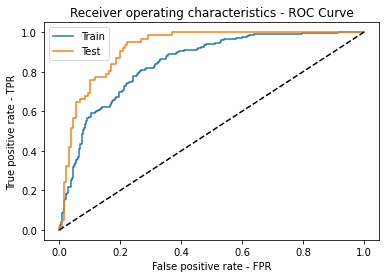

In [55]:
plt.plot(train_gnb_fpr, train_gnb_tpr, label='Train')
plt.plot(test_gnb_fpr, test_gnb_tpr, label='Test')

plt.plot([0,1],[0,1], color='black',linestyle='--')

plt.xlabel('False positive rate - FPR')
plt.ylabel('True positive rate - TPR')
plt.legend()
plt.title('Receiver operating characteristics - ROC Curve')

* K-nearest neighbour classifier :

In [56]:
df = {}
N = []
ac = []
for  i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain,Ytrain)
    Y_pred = knn.predict(Xtest)
    
    N.append(i)
    ac.append(roc_auc_score(Ytest,Y_pred))
    df.update({'K':N})
    df.update({'ROC_ACC':ac})
    
    df1 = pd.DataFrame(df)
    df1.sort_values('ROC_ACC',ascending=False,inplace=True,ignore_index=True)
    
df1.head(10)

,K,ROC_ACC
0,11,0.848263
1,10,0.811787
2,13,0.808685
3,5,0.805211
4,15,0.804467
5,19,0.800620
6,3,0.793300
7,9,0.793300
8,12,0.791811
9,14,0.787965


In [57]:
## Selecting ‘K = 11’
knn = KNeighborsClassifier(n_neighbors=11)

In [58]:
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=11)

In [59]:
Ypred4 = knn.predict(Xtest)

In [60]:
cm4 = confusion_matrix(Ytest,Ypred4)

In [61]:
print(classification_report(Ytest,Ypred4))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       130
           1       0.85      0.76      0.80        62

    accuracy                           0.88       192
   macro avg       0.87      0.85      0.86       192
weighted avg       0.88      0.88      0.88       192



In [62]:
print('Confusion matrix :','\n',cm4)

print('\nAccuracy :',accuracy_score(Ytest,Ypred4))

print('\nSensitivity : ', cm4[0,0]/(cm4[0,0]+cm4[0,1]) )
 
print('\nSpecificity : ', cm4[1,1]/(cm4[1,0]+cm4[1,1]))

Confusion matrix : 
 [[122   8]
 [ 15  47]]

Accuracy : 0.8802083333333334

Sensitivity :  0.9384615384615385

Specificity :  0.7580645161290323


In [63]:
train_knn_probabilities = knn.predict_proba(Xtrain)[:,1]
train_knn_fpr, train_knn_tpr, train_knn_thershold = roc_curve(Ytrain, train_knn_probabilities)

test_knn_probabilities = knn.predict_proba(Xtest)[:,1]
test_knn_fpr, test_knn_tpr, test_knn_thershold = roc_curve(Ytest, test_knn_probabilities)

Text(0.5, 1.0, 'Receiver operating characteristics - ROC Curve')

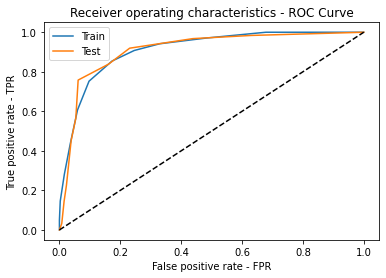

In [64]:
plt.plot(train_knn_fpr, train_knn_tpr, label='Train')
plt.plot(test_knn_fpr, test_knn_tpr, label='Test')

plt.plot([0,1],[0,1], color='black',linestyle='--')

plt.xlabel('False positive rate - FPR')
plt.ylabel('True positive rate - TPR')
plt.legend()
plt.title('Receiver operating characteristics - ROC Curve')

### Sequential Model

In [65]:
NB_EPOCHS = 500  # num of epochs to test for
BATCH_SIZE = 16

## Create our model
model = Sequential()

# 1st layer: input_dim=8, 12 nodes, RELU
model.add(Dense(12, input_dim=8, activation='relu'))
# 2nd layer: 8 nodes, RELU
model.add(Dense(8, activation='relu'))
# output layer: dim=1, activation sigmoid
model.add(Dense(1, activation='sigmoid' ))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
model.fit(Xtrain,Ytrain,validation_data=(Xtest, Ytest),epochs=NB_EPOCHS,batch_size=BATCH_SIZE,verbose=0)

In [67]:
model.evaluate(Xtest, Ytest)

6/6 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.8802


[0.4767009913921356, 0.8802083134651184]

In [68]:
Ypred5 = model.predict(Xtest)

6/6 [==============================] - 0s 857us/step


In [69]:
print(Ypred5.shape)

(192, 1)


In [70]:
import numpy as np
ypred5 = []
for i in Ypred5:
    if i>=0.5:
        ypred5.append(1)
    else:
        ypred5.append(0)
print(ypred5[:50])

[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [71]:
cm5 = confusion_matrix(Ytest,ypred5)

In [72]:
print('Confusion matrix :','\n',cm5)

print('\nAccuracy :',accuracy_score(Ytest,ypred5))

print('\nSensitivity : ', cm5[0,0]/(cm4[0,0]+cm5[0,1]) )
 
print('\nSpecificity : ', cm5[1,1]/(cm4[1,0]+cm5[1,1]))

Confusion matrix : 
 [[121   9]
 [ 14  48]]

Accuracy : 0.8802083333333334

Sensitivity :  0.9236641221374046

Specificity :  0.7619047619047619


Text(0.5, 1.0, 'Receiver operating characteristics - ROC Curve')

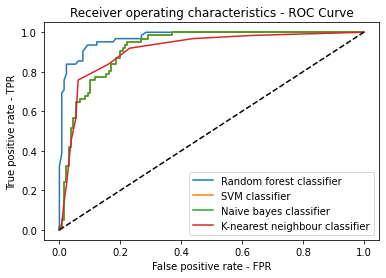

In [73]:
# ROC Curve of all four models
plt.plot(test_rfc_fpr, test_rfc_tpr, label='Random forest classifier')
plt.plot(test_svc_fpr, test_svc_tpr, label='SVM classifier')
plt.plot(test_gnb_fpr, test_gnb_tpr, label='Naive bayes classifier')
plt.plot(test_knn_fpr, test_knn_tpr, label='K-nearest neighbour classifier')

plt.plot([0,1],[0,1], color='black',linestyle='--')

plt.xlabel('False positive rate - FPR')
plt.ylabel('True positive rate - TPR')
plt.legend()
plt.title('Receiver operating characteristics - ROC Curve')

* Comparison of various models with the results from KNN algorithm :

In [74]:
Comparison_Table = pd.DataFrame({'Random Forest':[accuracy_score(Ytest,Ypred),cm1[0,0]/(cm1[0,0]+cm1[0,1]),cm1[1,1]/(cm1[1,0]+cm1[1,1])], 'SVM Classifier':
                                                             [accuracy_score(Ytest,Ypred2),cm2[0,0]/(cm2[0,0]+cm2[0,1]),
                                                              cm2[1,1]/(cm2[1,0]+cm2[1,1])], 'Naive Bayes':
                                                             [accuracy_score(Ytest,Ypred3),cm3[0,0]/(cm3[0,0]+cm3[0,1]),
                                                              cm3[1,1]/(cm3[1,0]+cm3[1,1])],'KNN':[accuracy_score(Ytest,
                                                              Ypred4),cm4[0,0]/(cm4[0,0]+cm4[0,1]),cm4[1,1]/(cm4[1,0]+
                                                              cm4[1,1])],'Sequential NN':[accuracy_score(Ytest,ypred5),
                                                              cm5[0,0]/(cm5[0,0]+cm5[0,1]),cm5[1,1]/(cm5[1,0]+cm5[1,1])]}, 
                                                              index=['Accuracy','Sensitivity','Specificity'])

In [75]:
Comparison_Table

,Random Forest,SVM Classifier,Naive Bayes,KNN,Sequential NN
Accuracy,0.916667,0.843750,0.781250,0.880208,0.880208
Sensitivity,0.923077,0.900000,0.876923,0.938462,0.930769
Specificity,0.903226,0.725806,0.580645,0.758065,0.774194


Accuracy is the ratio of number of correct predictions to the total number of predictions.  

Sensitivity is a measure of the proportion of actual positive cases which got predicted as positive (or true               positive). Sensitivity is also termed as Recall.
Sensitivity or true positive rate is a measure of the proportion of people suffering from the diabetes who got              predicted correctly as the ones suffering from the diabetes. In other words, the person who is diabetic                     (positive) actually got predicted as diabetic.

Specificity is defined as the proportion of actual negatives which got predicted as the negative. Specificity is a measure of the proportion of people not suffering from the diabetes who got predicted correctly as the ones who are not suffering from the diabetes. In other words, the proportion of person who is non-diabetic actually got predicted as non-diabetic is specificity.

So in this case it is very important to correctly predict that the patient is actually suffering from diabetes so that the patient can be treated accordingly and if our model is not able to correctly predict the diabetic patient that means our model fails to do its job. Sensitivity or true positive rate is a measure of the proportion of people suffering from the diabetes who got predicted correctly as the ones suffering from the diabetes.

Therefore to decide which model should be used for prediction we should use sensitivity and out of all the four model KNN has the the highest sensitivity.